In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dj38csv.csv')
data

,column1,column2
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [23]:
coord_list=data[['column1','column2']].values.tolist()
coord_list

[[11003.6111, 42102.5],
 [11108.6111, 42373.8889],
 [11133.3333, 42885.8333],
 [11155.8333, 42712.5],
 [11183.3333, 42933.3333],
 [11297.5, 42853.3333],
 [11310.2778, 42929.4444],
 [11416.6667, 42983.3333],
 [11423.8889, 43000.2778],
 [11438.3333, 42057.2222],
 [11461.1111, 43252.7778],
 [11485.5556, 43187.2222],
 [11503.0556, 42855.2778],
 [11511.3889, 42106.3889],
 [11522.2222, 42841.9444],
 [11569.4444, 43136.6667],
 [11583.3333, 43150.0],
 [11595.0, 43148.0556],
 [11600.0, 43150.0],
 [11690.5556, 42686.6667],
 [11715.8333, 41836.1111],
 [11751.1111, 42814.4444],
 [11770.2778, 42651.9444],
 [11785.2778, 42884.4444],
 [11822.7778, 42673.6111],
 [11846.9444, 42660.5556],
 [11963.0556, 43290.5556],
 [11973.0556, 43026.1111],
 [12058.3333, 42195.5556],
 [12149.4444, 42477.5],
 [12286.9444, 43355.5556],
 [12300.0, 42433.3333],
 [12355.8333, 43156.3889],
 [12363.3333, 43189.1667],
 [12372.7778, 42711.3889],
 [12386.6667, 43334.7222],
 [12421.6667, 42895.5556],
 [12645.0, 42973.3333]]

In [7]:
fitness_coords = mlrose.TravellingSales(coords=coord_list)

In [8]:
problem_fit = mlrose.TSPOpt(length = 38, fitness_fn = fitness_coords, maximize=False)

In [10]:
t1 = time.time()

In [11]:
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem=problem_fit,
                                                             pop_size=5000,
                                                             mutation_prob=0.1,
                                                             max_attempts=20,
                                                             max_iters=100,
                                                             curve=True)

In [12]:
t2 = time.time()
comp_time = t2 - t1

In [13]:
comp_time

109.04681324958801

In [14]:
soln = pd.DataFrame(best_state, columns=[''])
soln.to_csv("Dj38_sol.csv", sep=",")

In [16]:
print(best_state)
print(best_fitness)
print(fitness_curve)

[ 0  1  9 28 29 25 16 35 34 19 13 27 21  7  6  2 18 31 37 22 15 14 23  3
 10 11  4 12 33 17  8  5 24 30 26 32 36 20]
20146.250171173626
[-20682.36293813 -20486.22271889 -20486.22271889 -20486.22271889
 -20486.22271889 -20486.22271889 -20486.22271889 -20486.22271889
 -20486.22271889 -20486.22271889 -20486.22271889 -20486.22271889
 -20146.25017117 -20146.25017117 -20146.25017117 -20146.25017117
 -20146.25017117 -20146.25017117 -20146.25017117 -20146.25017117
 -20146.25017117 -20146.25017117 -20146.25017117 -20146.25017117
 -20146.25017117 -20146.25017117 -20146.25017117 -20146.25017117
 -20146.25017117 -20146.25017117 -20146.25017117 -20146.25017117
 -20146.25017117]


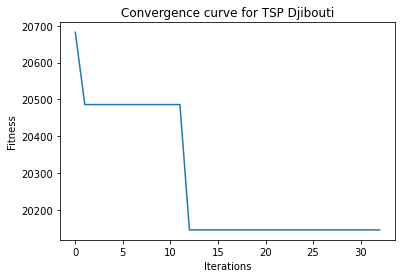

In [25]:
plt.plot(-(fitness_curve))
plt.title("Convergence curve for TSP Djibouti")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()